# Scatter Matrix

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

## Scatter matrix
Scatter matrix = $\sum[(\mu-x_k)(\mu-x_k)^T]$.  
Scatter matrix = outer product (u-x) * (u-x).  
For d dimensional data, scatter matrix size is (d x d).   
The (scatter matrix)/n is the maximum likelihood estimate of the covariance matrix, assuming normality.  

Note similarity to covariation matrix.  
cov(X,Y) = $\sigma(X,Y) = (1/n)\sum_1^n[(\mu_{x}-x)(\mu_{y}-y)^T]$  

Matrix M is positive definite if $z^TMz$ is positive for all real column vectors z.  
Matrix M is positive semi-definite if $z^TMz$ is non-negative for all real column vectors z.  
The scatter matrix is positive semi-definite.   

See wikipedia [scatter matrix](https://en.wikipedia.org/wiki/Scatter_matrix)

In [2]:
def scatter_matrix(X):
    """For 100 points in 2D space, X has size=(100,2)"""
    instances = X.shape[0]
    features = X.shape[1]
    means = np.mean(X)  # vector of feature means
    sm = np.zeros( (features,features) )
    for i in range(instances):
        deviation = means-X[i] # vector of feature deviations
        outer_product = np.outer(deviation,deviation)
        sm += outer_product
    return sm
        

Scatter matrix
[[20722.5825   616.5775]
 [  616.5775 21307.5725]]
ML estimate of Covariance matrix
[[207.225825   6.165775]
 [  6.165775 213.075725]]
Numpy estimate of Covariance matrix
[[208.56323232   6.98383838]
 [  6.98383838 214.47222222]]


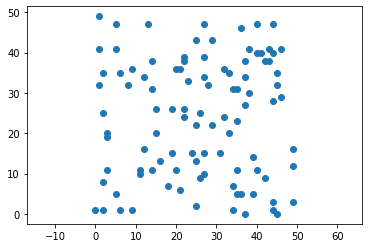

In [3]:
# One hundred uniformly scattered points.
N = 100
x = np.random.randint(0, 50, N)
y = np.random.randint(0, 50, N)
xy = np.asarray(list(zip(x, y)))  # N rows of (x,y)
sm = scatter_matrix(xy)
print('Scatter matrix')
print(sm)
mlcov = sm/N
print('ML estimate of Covariance matrix')
print(mlcov)
print('Numpy estimate of Covariance matrix')
obs = np.array( [x,y] )   # row of x values, row of values
print(np.cov(obs))

plt.scatter(x, y)
plt.axis('equal')    # uniform aspect ratio, not same coords
plt.show()

Scatter matrix
[[4940.39159753   35.27320628]
 [  35.27320628  209.59422518]]
ML estimate of Covariance matrix
[[24.70195799  0.17636603]
 [ 0.17636603  1.04797113]]
Numpy estimate of Covariance matrix
[[24.79708473  0.20625599]
 [ 0.20625599  1.02423362]]


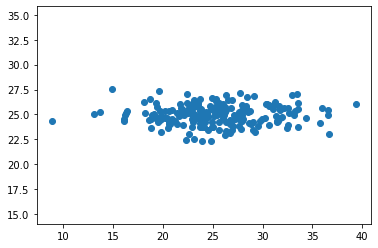

In [4]:
# Multivariate gaussian.
N = 200
mu = 25
sigma_x = 5
sigma_y = 1
x = np.random.normal(mu, sigma_x, N)
y = np.random.normal(mu, sigma_y, N)
xy = np.asarray(list(zip(x, y)))  # N rows of (x,y)
sm = scatter_matrix(xy)
print('Scatter matrix')
print(sm)
mlcov = sm/N
print('ML estimate of Covariance matrix')
print(mlcov)
print('Numpy estimate of Covariance matrix')
obs = np.array( [x,y] )   # row of x values, row of values
print(np.cov(obs))

plt.scatter(x, y)
plt.axis('equal')    # uniform aspect ratio, not same coords
plt.show()